In [1]:
import sys
sys.path.append("../src")

from torchvision.datasets import CelebA

In [2]:
dataset = CelebA(root="../../data", split="train",  target_type=["identity"], download=False)


In [35]:
from reid.celeba_dataset import CelebADataset

data_root = "/Users/vlad/PycharmProjects/data/celeba_np"
dataset = CelebADataset(data_root)

In [102]:
dataset[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x131479750>,
 tensor(2880))

In [42]:
m = {}
for i, (_, class_id) in tqdm(enumerate(dataset)):
    if class_id not in m.keys():
        m[class_id] = list()
    m[class_id].append(i)
        

162770it [00:08, 19040.22it/s]


In [43]:
class_instances = [len(l) for l in m.values()]

In [46]:
class_instances = np.array(class_instances)
print(np.mean(class_instances))
print(np.min(class_instances))
print(np.max(class_instances))


19.869384765625
1
35


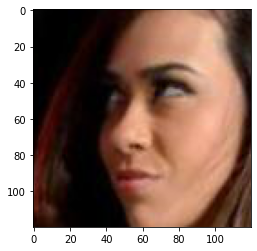

In [86]:
i = 5
plt.imshow(dataset[m[2][i]][0])

In [71]:
from reid.lfw_dataset import LfwDataset

lfw_root = "/Users/vlad/PycharmProjects/data/lfw_np"
lfw = LfwDataset(lfw_root)

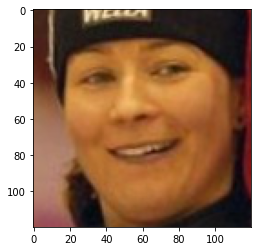

In [85]:
plt.imshow(lfw[13][0])

In [4]:
identity = dataset.identity.tolist()
identity = list([i[0] for i in identity])

In [5]:
len(set(identity))

1000

In [6]:
max(identity)

10169

In [7]:
from tqdm import tqdm
import numpy as np

images = []
labels = []

for i, (image, p_id) in tqdm(enumerate(dataset), total=len(dataset)):
    faces = d.detect(image)
    if len(faces) == 0:
        continue
    face = crop_face(image)
    face = np.array(face).astype(np.uint8)
    images.append(face)
    labels.append(p_id)

images = np.array(images)
labels = np.array(labels)

100%|██████████| 162770/162770 [10:09:03<00:00,  4.45it/s]      


In [104]:
images.shape

(162770, 112, 96, 3)

In [105]:
save_path = "celeba_images.npy"
np.save(save_path, images)

In [106]:
labels_path = "celeba_labels.npy"
np.save(labels_path, labels)

In [44]:
np.array(dataset[0][0]).shape

(218, 178, 3)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

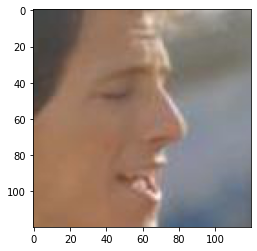

In [39]:
plt.imshow(dataset[2][0])

In [3]:
from facenet_pytorch import MTCNN

In [4]:
d = MTCNN(post_process=False)

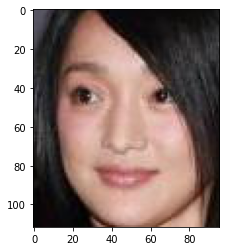

In [99]:
image = dataset[8][0]
# print(d.detect(image))
# face = d(image).permute(1, 2, 0).int().numpy()
# print(face.dtype)
# face = Image.fromarray(np.uint8(face))
plt.imshow(crop_face(image))

In [6]:
def crop_face(image):
    width = 96
    height = 112
    image_shape = image.size
    box = [
        (image_shape[0] - width) / 2,
        (image_shape[1] - height) / 2 + 15,
        (image_shape[0] - width) / 2 + width,
        (image_shape[1] - height) / 2 + height + 15,
    ]
    return image.crop(box)

In [21]:


from ..src.reid.lfw_dataset import LfwDataset

dataset = LfwDataset("/Users/vlad/PycharmProjects/data/lfw")

ImportError: attempted relative import with no known parent package

In [107]:
import os

root_path = "/Users/vlad/PycharmProjects/data/lfw"
mapping = {}
paths = []

for root, _, files in os.walk(root_path):
    for file in files:
        if file.split(".")[-1] != "jpg":
            continue
        image_path = os.path.join(root, file)
        mapping[file.split(".")[0]] = len(paths)
        paths.append(image_path)

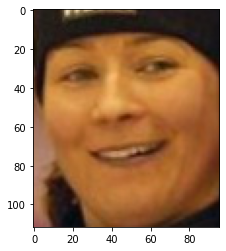

In [118]:
from PIL import Image

image = Image.open(paths[13])

face = crop_face(image)

plt.imshow(face)

In [109]:
from tqdm import tqdm
import numpy as np

images = []

for i, path in tqdm(enumerate(paths), total=len(paths)):
    image = Image.open(path)
    face = crop_face(image)
    face = np.array(face).astype(np.uint8)
    images.append(face)

images = np.array(images)

100%|██████████| 13233/13233 [00:35<00:00, 376.45it/s]


In [110]:
save_path = "lfw_images.npy"
np.save(save_path, images)

In [111]:
pairs = []
pairs_path = os.path.join(root_path, "pairs.txt")

with open(pairs_path, "r") as f:
    for line in f.readlines():
        splits = line.split()
        if len(splits) == 3:
            name, first, second = splits
            first_name = "{}_{:04d}".format(name, int(first))
            second_name = "{}_{:04d}".format(name, int(second))
            first_id = mapping[first_name]
            second_id = mapping[second_name]

            pairs.append((first_id, second_id, True))
        if len(splits) == 4:
            name1, id1, name2, id2 = splits
            first_name = "{}_{:04d}".format(name1, int(id1))
            second_name = "{}_{:04d}".format(name2, int(id2))
            first_id = mapping[first_name]
            second_id = mapping[second_name]

            pairs.append((first_id, second_id, False))

In [112]:
len(pairs)

6000

In [113]:
pairs = np.array(pairs)

In [114]:
save_path = "lfw_pairs.npy"
np.save(save_path, pairs)